In [2]:
import pandas as pd
import matplotlib.pyplot as plt

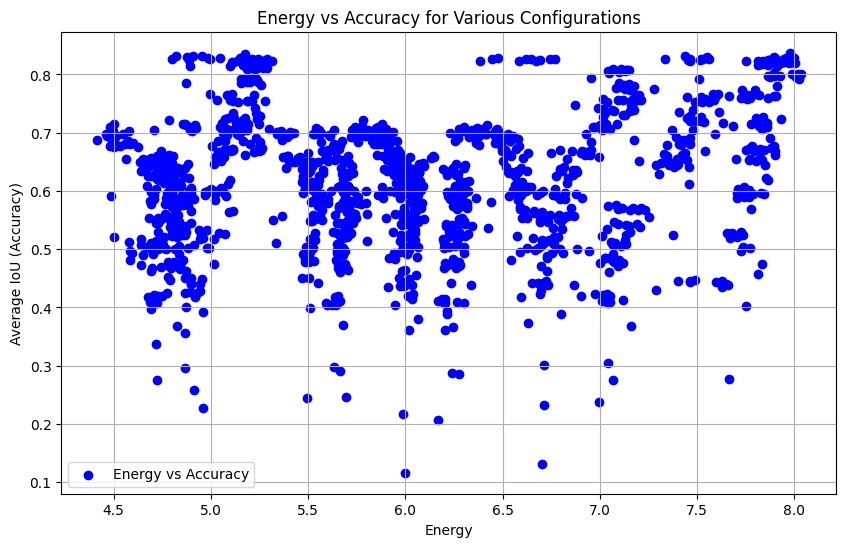

In [3]:
# Load the CSV files
accuracy_df = pd.read_csv('accuracy.csv')  # File containing "Average IoU"
energy_files = ['1_5ghz-1.csv', '1_8ghz-1.csv', '2_1ghz-1.csv', '2_4ghz-1.csv']  # Energy files

# Merge all energy files into one DataFrame
energy_df = pd.concat([pd.read_csv(f) for f in energy_files], ignore_index=True)

# Merge the accuracy and energy data on common columns
merged_df = pd.merge(accuracy_df, energy_df, on=["Frequency", "Filter", "Threshold", "Frame Bitrate"])
merged_df = merged_df.drop(columns=['FPS', 'Start Time', 'End Time'])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Avg Energy'], merged_df['Average IoU'], color='b', label='Energy vs Accuracy')

# Labels and title
plt.xlabel('Energy')
plt.ylabel('Average IoU (Accuracy)')
plt.title('Energy vs Accuracy for Various Configurations')

# Add grid and show the plot
plt.grid(True)
plt.legend()
plt.show()

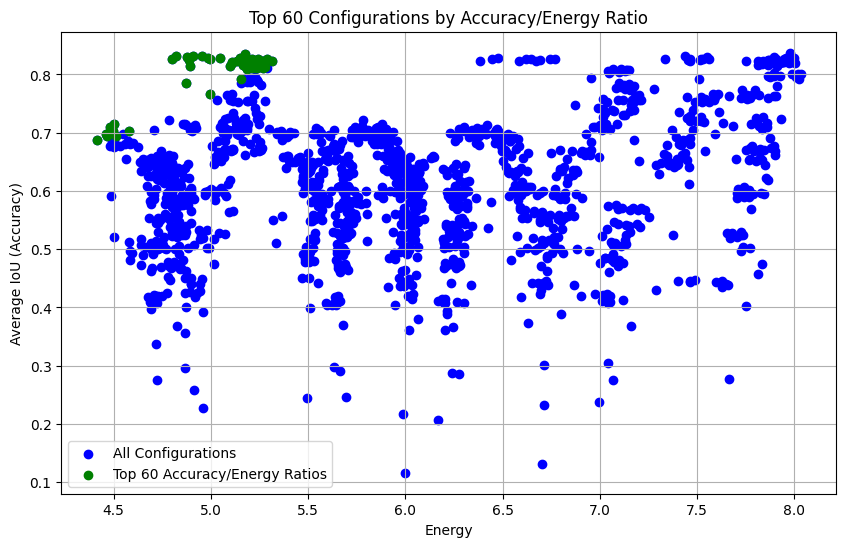

Top 60 Configurations by Accuracy/Energy Ratio:


,Frequency,Filter,Threshold,Frame Bitrate,Average IoU,Avg Energy,Accuracy to Energy Ratio
252,1.5,pixel,0.0000,3000,0.8310,4.818542,0.172459
245,1.5,pixel,0.0000,1000,0.8260,4.801466,0.172031
243,1.5,pixel,0.0000,400,0.8297,4.879438,0.170040
246,1.5,pixel,0.0000,1300,0.8312,4.906838,0.169396
250,1.5,pixel,0.0000,2400,0.8255,4.887200,0.168911
251,1.5,pixel,0.0000,2700,0.8321,4.952780,0.168007
244,1.5,pixel,0.0000,700,0.8138,4.891927,0.166356
249,1.5,pixel,0.0000,2100,0.8276,4.986178,0.165979
247,1.5,pixel,0.0000,1600,0.8271,4.994458,0.165604
248,1.5,pixel,0.0000,1900,0.8275,5.048415,0.163913


In [7]:
# Calculate the accuracy/energy ratio
merged_df['Accuracy to Energy Ratio'] = merged_df['Average IoU'] / merged_df['Avg Energy']

# Get the top k configurations by Accuracy to Energy Ratio
k = 60  # Change this to the number of configurations you want
top_k_df = merged_df.nlargest(k, 'Accuracy to Energy Ratio')

# Plotting the full dataset
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Avg Energy'], merged_df['Average IoU'], color='b', label='All Configurations')

# Plot the top k configurations
plt.scatter(top_k_df['Avg Energy'], top_k_df['Average IoU'], color='g', label=f'Top {k} Accuracy/Energy Ratios')

# Labels and title
plt.xlabel('Energy')
plt.ylabel('Average IoU (Accuracy)')
plt.title(f'Top {k} Configurations by Accuracy/Energy Ratio')

# Add grid and show the plot
plt.grid(True)
plt.legend()
plt.show()

# Output the top k configurations
print(f"Top {k} Configurations by Accuracy/Energy Ratio:")
top_k_df